In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import pandas as pd
from descartes import PolygonPatch

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world[world.name=='United Kingdom'].head(20)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


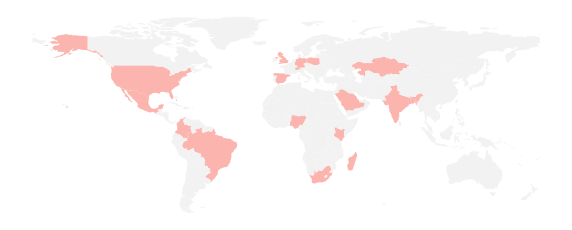

In [72]:
countries= ['Bahamas','Bangladesh','Brazil','Colombia','Germany','India','Kazakhstan','Kenya','Madagascar','Mexico','Nigeria','Poland', 'Saudi Arabia',
            'South Africa','Spain','Switzerland','United Kingdom','United States of America']

def countries_omdena(names):

    labels=[]
    for name in names:

        if name in countries:
            label=50
        else:
            label=100
        labels.append(label)
    world['labels']=labels

countries_omdena(world['name']) 

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

ax2 = world.plot(column='labels', figsize=(10,10), cmap='Pastel1')

#plotCountryPatch(ax2, 'Namibia', 'yellow')

ax2.set_xticks([], [])
ax2.set_yticks([], [])
ax2.axis('off')

#ax2.axis('scaled')
plt.show()


In [73]:
wfp_countries= pd.read_csv('WBI_Data_ForFinalMath.csv')

income= pd.read_csv('WBI_IL_ForFinalMath.csv')

income = income[['Country Code', 'Income_level']]

len(income)
len(world)
income

,Country Code,Income_level
0,ABW,High
1,AFG,Low
2,AGO,Low_Middle
3,ALB,High_Middle
4,AND,High
...,...,...
213,XKX,High_Middle
214,YEM,Low
215,ZAF,High_Middle
216,ZMB,Low_Middle


<Figure size 432x288 with 0 Axes>

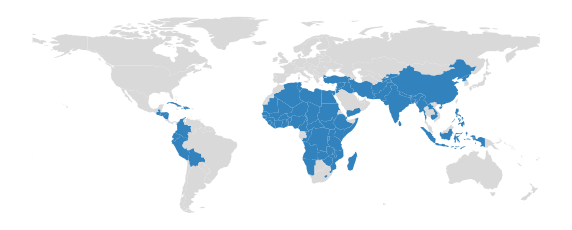

In [91]:
# World map for WFP

def countries_wfp(names):

    labels=[]
    for name in names:

        if name in list(wfp_countries['ISO_CODE']):
            label=25
        else:
            label=100
        labels.append(label)
    world['wfp']=labels
    #print(labels)

countries_wfp(world['iso_a3']) 

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

plt.figure()

ax3 = world.plot(column='wfp', figsize=(10,10), cmap='tab20c')

#plotCountryPatch(ax2, 'Namibia', 'yellow')

ax3.set_xticks([], [])
ax3.set_yticks([], [])
ax3.axis('off')


plt.show()



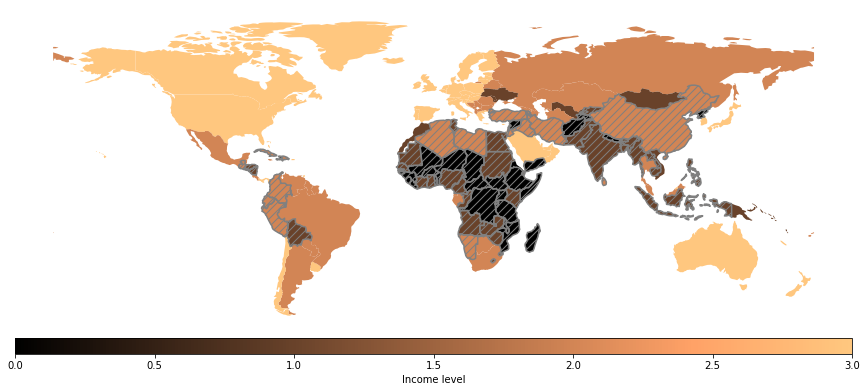

In [103]:
# World map for Income Level

def countries_income(names):

    labels=[]
    for name in names:

        if name in list(income['Country Code']):
                        
            country= income[income['Country Code']==name]

            if country['Income_level'].iloc[0] =='Low':
                label=0
            elif country['Income_level'].iloc[0] =='Low_Middle':
                label=1            
            elif country['Income_level'].iloc[0] =='High_Middle':
                label=2            
            elif country['Income_level'].iloc[0] =='High':
                label=3            
            else:
                raise NotImplementedError('Unknown Income')
                
        else:
            
            label= float('nan')
            #raise NotImplementedError('Cannot find Country')

        labels.append(label)
    
    world['income']=labels
    #print(labels)

countries_income(world['iso_a3']) 

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

fig, ax3 = plt.subplots(1, 1, figsize=(15,15))

divider = make_axes_locatable(ax3)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax3 = world.plot(column='income', ax=ax3, cmap='copper', legend=True, cax=cax, 
                 legend_kwds={'label': "Income level",'orientation': "horizontal"})
#plotCountryPatch(ax2, 'Namibia', 'yellow')

ax3.set_xticks([], [])
ax3.set_yticks([], [])
ax3.axis('off')

world[world['wfp']==25].boundary.plot(ax=ax3, color='gray', hatch='///')

#plt.show()


